<a href="https://colab.research.google.com/github/mjmousavi97/Deep-Learning-Tehran-uni/blob/main/HomeWorks/01%20HW/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Classification using Auto-Encoder on MNIST Dataset

In this project, we aim to solve a classification task using an Auto-Encoder. The objective is to become familiar with Auto-Encoders, as well as popular deep learning libraries such as TensorFlow/Keras or PyTorch, while working with the MNIST dataset.

### Part 1: Working with the Dataset

In this section, we load and preprocess the MNIST dataset. Using the following line of code, we can easily load the data:

```python
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
```

Next, we visualize the distribution of training data by plotting the number of samples for each digit class. This helps us understand the class balance in the training set. Additionally, we display 5 randomly selected images from the training set to become familiar with the dataset.

After that, we normalize the data and flatten each image to be represented as a 784-dimensional vector (28x28 pixels), which will be used as input features in the next stage.

### Part 2: Auto-Encoder Network

We now design and train an Auto-Encoder model consisting of two main components:

- **Encoder**: Reduces the dimensionality of the input data.
- **Decoder**: Reconstructs the original input from the compressed representation.

The architecture of the network is given below:

| Encoder |       | Decoder |        |
|---------|-------|---------|--------|
| Input   | 784   | Input   | 30     |
| FC      | 500   | FC      | 100    |
| FC      | 100   | FC      | 500    |
| Output  | 30    | Output  | 784    |

Once the model is implemented, we train it using the training data. We also plot the training and validation loss to monitor the model's learning process. The reconstruction loss is calculated only at the output layer.


In [2]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("✅ GPU is available!")
else:
    print("❌ No GPU found.")

✅ GPU is available!


In [24]:
import torch
import tensorflow.keras
from keras.layers import Dense, Input
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Shape of X train: {X_train.shape}')
print(f'Shape of y train: {y_train.shape}')
print(f'Shape of X test: {X_test.shape}')
print(f'Shape of y test: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


In [5]:
def plot_random_image(images):
    selected_images  = [np.random.choice(images.shape[0], replace=False) for i in range(5)]

    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[selected_images[i]], cmap='grey')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


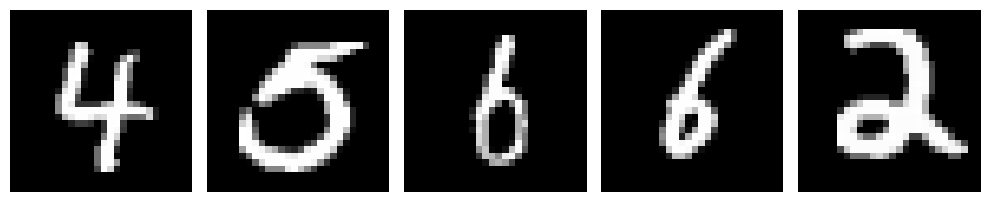

In [6]:
plot_random_image(X_train)

In [7]:
X_train_norm = X_train.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255

In [8]:
X_train_norm_vec = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_norm_vec = X_test_norm.reshape(X_test_norm.shape[0], -1)

print(f'Shape of X train: {X_train_norm_vec.shape}')
print(f'Shape of X test: {X_test_norm_vec.shape}')


Shape of X train: (60000, 784)
Shape of X test: (10000, 784)


In [33]:
# auto_encoder
input_size = 784      #input size
hidden_size1 = 500    #Number of neurons in the first layer
hidden_size2 = 300    #Number of neurons in the second layer
hidden_size3 = 100    #Number of neurons in the third layer
latent_size = 30      #latent size

In [34]:
# encoder and decoder
input_layer = Input(shape = (input_size, ))
hidden_layer1 = Dense(hidden_size1, activation='relu')(input_layer)
hidden_layer2 = Dense(hidden_size2, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(hidden_size3, activation='relu')(hidden_layer2)

# latent space
latent_layer = Dense(latent_size, activation = "sigmoid")(hidden_layer3)
hidden_layer4 = Dense(hidden_size3, activation = "sigmoid")(latent_layer)
hidden_layer5 = Dense(hidden_size2, activation = "sigmoid")(hidden_layer4)
hidden_layer6 = Dense(hidden_size1, activation = "sigmoid")(hidden_layer5)
output_layer = Dense(input_size, activation = "sigmoid")(hidden_layer6)

In [35]:
autoencoder = Model(input_layer, output_layer)
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 30)             │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 300)            │        30,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 500)            │       150,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 784)            │       392,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,152,614 (4.40 MB)

 Trainable params: 1,152,614 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
optimizer = Adam(learning_rate=0.0005)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

In [37]:
history = autoencoder.fit(X_train_norm_vec, X_train_norm_vec, batch_size=32, epochs=100, shuffle=True, validation_data=(X_test_norm_vec, X_test_norm_vec))

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2639 - val_loss: 0.2117
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.2054 - val_loss: 0.1925
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1908 - val_loss: 0.1848
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1836 - val_loss: 0.1820
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1796 - val_loss: 0.1777
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1765 - val_loss: 0.1753
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1749 - val_loss: 0.1725
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1705 - val_loss: 0.1675
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1671 - val_loss: 0.1654
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1639 - val_loss: 0.1628
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1614 - val_loss: 0.1602
Epoch 12/10

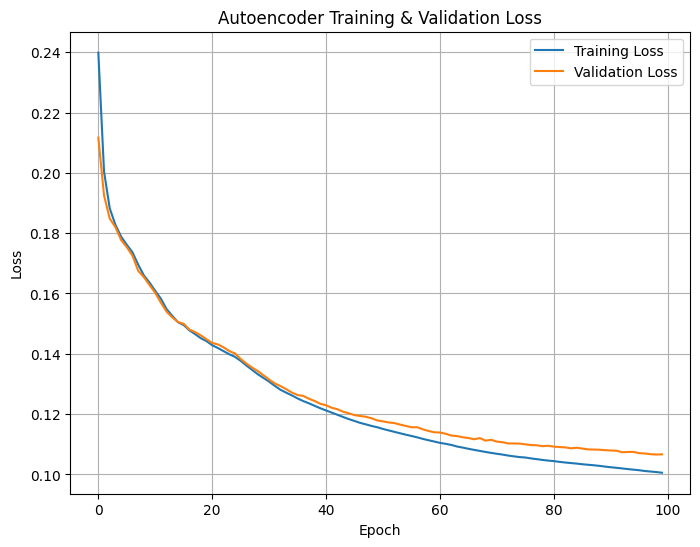

In [39]:
plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#predict test data with model
encoded_img = autoencoder.predict(X_test_norm_vec)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [42]:
encoded_img.shape

(10000, 784)

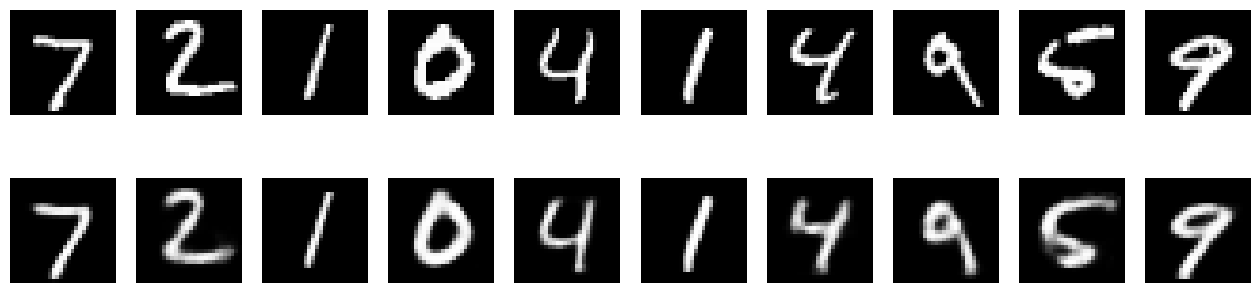

In [46]:
n = 10
plt.figure(figsize=(16, 4))
for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(X_test_norm_vec[i].reshape(28, 28), cmap='grey')
    plt.axis('off')

    plt.subplot(2, n, i+n+1)
    plt.imshow(encoded_img[i].reshape(28, 28), cmap='grey')
    plt.axis('off')

In [47]:
# classification model
latent_1 = Input(shape = (latent_size,))
layer_1 = Dense(30,activation="sigmoid")(latent_1)
layer_2 = Dense(30,activation="sigmoid")(layer_1)
layer_3 = Dense(10,activation="softmax")(layer_2)

#define classifier model
classifier = Model(latent_1, layer_3)
classifier.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,170 (8.48 KB)

 Trainable params: 2,170 (8.48 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
encoder = Model(input_layer, latent_layer)
encoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 30)             │         3,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,930 (2.20 MB)

 Trainable params: 575,930 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
#encoder output
encoded_train = encoder.predict(X_train_norm_vec)
encoded_test = encoder.predict(X_test_norm_vec)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [53]:
encoded_train.shape

(60000, 30)

In [51]:
#Convert output label to categorical form
train_label = tensorflow.keras.utils.to_categorical(y_train, 10)
test_label = tensorflow.keras.utils.to_categorical(y_test, 10)

In [55]:
#compile and fit classifier
#fit the model with adam optimizer and categorical cross entropy
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = classifier.fit(encoded_train, train_label, epochs = 100, validation_data =(encoded_test,test_label))

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4520 - loss: 1.7546 - val_accuracy: 0.9205 - val_loss: 0.4892
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9221 - loss: 0.4171 - val_accuracy: 0.9402 - val_loss: 0.2766
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9400 - loss: 0.2738 - val_accuracy: 0.9488 - val_loss: 0.2267
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9465 - loss: 0.2340 - val_accuracy: 0.9492 - val_loss: 0.2063
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9504 - loss: 0.2149 - val_accuracy: 0.9517 - val_loss: 0.1946
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9522 - loss: 0.2014 - val_accuracy: 0.9519 - val_loss: 0.1890
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9541 - loss: 0.1906 - val_accuracy: 0.9530 - val_loss: 0.1824
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9561 - loss: 

In [56]:
predicted = np.argmax(classifier.predict(encoded_test), axis=1)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9642


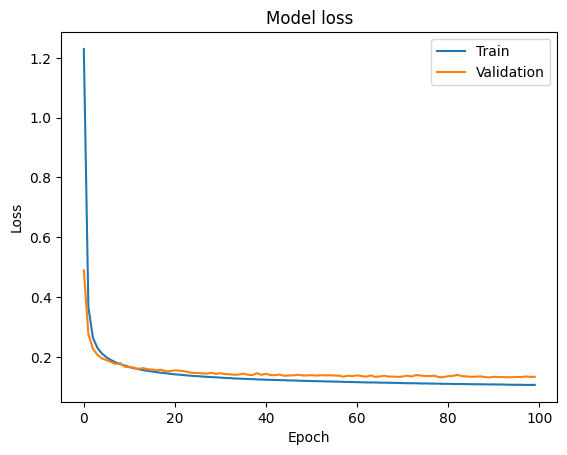

In [57]:
#show data validation and data train loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

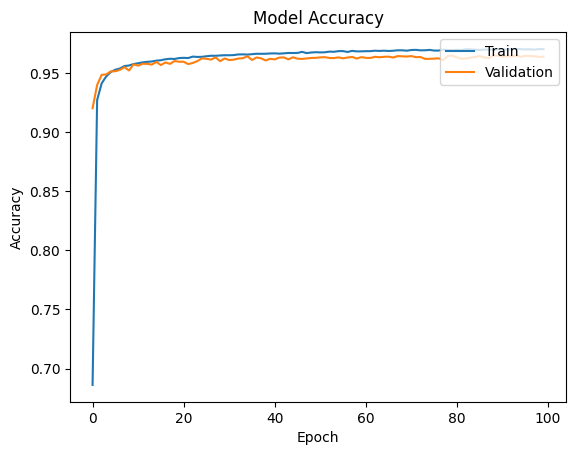

In [58]:
#show data validation and data train loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()